In [1]:
import zipfile
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
  zip_ref.extractall("")

In [2]:
import os
import cv2
import numpy as np
import pandas as pd

Name
Latest commit
￼
akashasd
Add files via upload
171d5a5
 ·
5 days ago
History
5 Commits
Assesment1.ipynb
Add files via upload
last week
Clustering.ipynb
Add files via upload
5 days ago
assessment2.ipynb
Add files via upload
last week
face_detection.ipynb
Add files via upload
5 days ago
face_recognition.ipynb
Add files via upload
last week
Repository files navigation
README
Add a README


def extract_features(img):
    return  list(cv2.mean(im))[:3]


data=[]
basepath='./dataset/'
for folder in os.scandir(basepath):
    if folder.is_dir():
        #print(folder.name)
        for file in os.scandir(folder.path):
            im=cv2.imread(file.path)
            im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
            features=extract_features(im)
            features.append(folder.name)
            data.append(features)
            #print(features)

In [3]:
print(data)

[[165.81769965397925, 171.0566920415225, 143.59790726643598, 'melon'], [196.76813440860215, 141.60847849462365, 129.94942204301074, 'melon'], [197.1388400636981, 180.72692446367407, 164.11924238327023, 'melon'], [148.11437037037038, 129.7312, 84.09592098765432, 'melon'], [168.28789925313842, 166.92148021611314, 147.61864373112982, 'melon'], [148.11437037037038, 129.7312, 84.09592098765432, 'melon'], [217.58591259232858, 207.05540703776313, 196.4403057486287, 'melon'], [191.58952649111674, 189.28896335659897, 163.06587087563452, 'melon'], [196.4696317204301, 141.29879569892472, 129.61652688172043, 'melon'], [216.19443616492796, 224.07205166418282, 198.71262791852956, 'melon'], [183.69758646481884, 166.24619744424427, 158.61590341645334, 'melon'], [189.83143399810066, 166.85586815447925, 138.57514245014244, 'melon'], [183.6846496634114, 166.2378011651549, 158.60121150827513, 'melon'], [167.80424691358024, 185.98696296296296, 154.67926913580246, 'melon'], [166.03120987654322, 170.96171851

In [4]:
df = pd.DataFrame(data, columns=['R','G','B','class'])
df.to_csv('curdata.csv',index=False)

In [5]:
df = pd.read_csv('curdata.csv')
print(df)

             R           G           B  class
0   165.817700  171.056692  143.597907  melon
1   196.768134  141.608478  129.949422  melon
2   197.138840  180.726924  164.119242  melon
3   148.114370  129.731200   84.095921  melon
4   168.287899  166.921480  147.618644  melon
5   148.114370  129.731200   84.095921  melon
6   217.585913  207.055407  196.440306  melon
7   191.589526  189.288963  163.065871  melon
8   196.469632  141.298796  129.616527  melon
9   216.194436  224.072052  198.712628  melon
10  183.697586  166.246197  158.615903  melon
11  189.831434  166.855868  138.575142  melon
12  183.684650  166.237801  158.601212  melon
13  167.804247  185.986963  154.679269  melon
14  166.031210  170.961719  143.619990  melon
15  199.091488  173.718730  156.212222  melon
16  197.159508  180.733692  164.102694  melon
17  165.785284  171.094239  143.600875  melon
18  201.572205  178.405792  150.471826  melon
19  201.327727  178.404728  150.465240  melon
20  240.578963  220.283970  163.49

In [6]:
lX = df[df['class']=='lemon']
mX = df[df['class']=='melon']

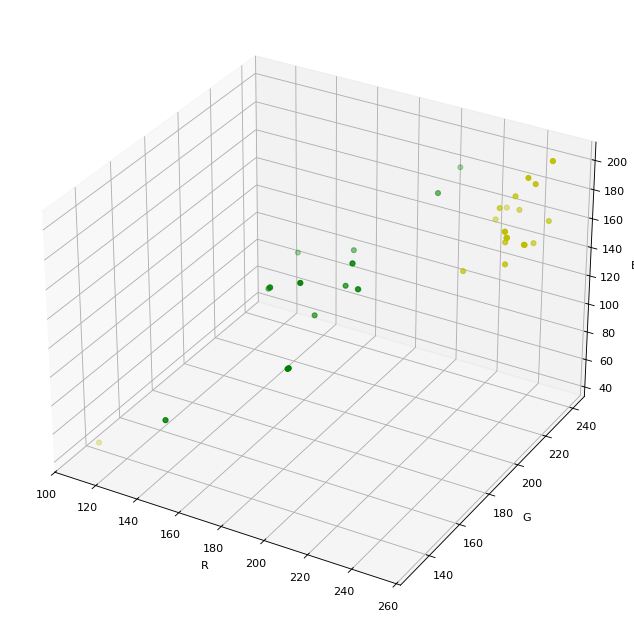

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B');

ax.scatter3D(lX['R'], lX['G'], lX['B'],color='y')
ax.scatter3D(mX['R'], mX['G'], mX['B'],color='g')

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(X)
print(y)

le = preprocessing.LabelEncoder()
y=le.fit(y).transform(y)

print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


[[165.81769965 171.05669204 143.59790727]
 [196.76813441 141.60847849 129.94942204]
 [197.13884006 180.72692446 164.11924238]
 [148.11437037 129.7312      84.09592099]
 [168.28789925 166.92148022 147.61864373]
 [148.11437037 129.7312      84.09592099]
 [217.58591259 207.05540704 196.44030575]
 [191.58952649 189.28896336 163.06587088]
 [196.46963172 141.2987957  129.61652688]
 [216.19443616 224.07205166 198.71262792]
 [183.69758646 166.24619744 158.61590342]
 [189.831434   166.85586815 138.57514245]
 [183.68464966 166.23780117 158.60121151]
 [167.80424691 185.98696296 154.67926914]
 [166.03120988 170.96171852 143.61999012]
 [199.0914881  173.71873016 156.21222222]
 [197.15950814 180.73369239 164.1026944 ]
 [165.78528443 171.09423945 143.60087474]
 [201.57220483 178.40579232 150.47182577]
 [201.32772733 178.40472797 150.46524048]
 [240.57896296 220.28397037 163.49147654]
 [227.15680079 211.09937407 143.47723795]
 [238.35421235 229.3580642  183.05447901]
 [238.90226907 231.64895877 171.97

In [9]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(random_state=42, hidden_layer_sizes=(100,50),max_iter=1000, solver='adam')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[5 1]
 [0 8]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.89      1.00      0.94         8

    accuracy                           0.93        14
   macro avg       0.94      0.92      0.93        14
weighted avg       0.94      0.93      0.93        14



In [10]:
import urllib.request

def get_image(url):

  # Open the URL and read the image data
  with urllib.request.urlopen(url) as response:
      image_data = response.read()

  # Decode the image data and convert it to a NumPy array
  image_array = np.array(bytearray(image_data), dtype=np.uint8)

  # Decode the image array into an OpenCV image
  image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
  return image

Enter image url : https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSCR2eBUKsjuLAl0oqz7YvkZJFU1C3znejG4g&s
It is a melon


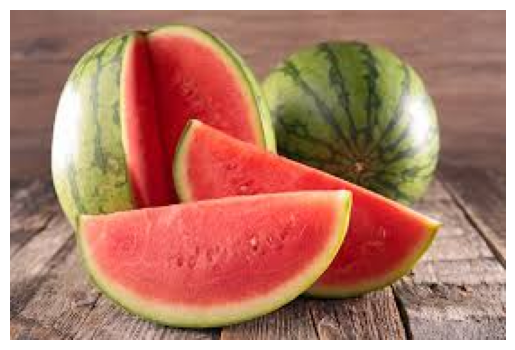

In [13]:

import matplotlib.pyplot as plt

url=input("Enter image url : ")
im=get_image(url)
im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
features=extract_features(im)
yp=classifier.predict([features])
yp=le.inverse_transform(yp)

print('It is a '+yp[0])
plt.axis("off")
plt.imshow(im)
plt.show()